# Loan Prediction Problem¶
A Finance company wants to automate the loan eligibility process based on the customer details provided while filling application form. These details are Gender,Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# Importing Libraries


In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# Classifiers（algorithm for classification）

from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report
# import advanced algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#for validating your classification model
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# grid search
from sklearn.model_selection import GridSearchCV

# others
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data loading and cleaning

In [374]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [375]:
train = pd.read_csv('/content/drive/My Drive/Materials/train_u6lujuX_CVtuZ9i.csv')
predict = pd.read_csv('/content/drive/My Drive/Materials/test_Y3wMUE5_7gLdaTN.csv')

#Let's Make copy of the original datasets so we do not hamper the original datasets.

In [376]:
train_original = train.copy()
predict_original = predict.copy()

In [377]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [378]:
predict.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


## Data Cleaning - Checking and working with missing value

In [379]:
# data inspection
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [380]:
# data inspection
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [381]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [382]:
# data inspection
predict.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [383]:
# check the number of missing values for each column
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [384]:
# check the number of missing values for each column
predict.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

* There are some missing values in both dataset and we need to deal with them. We are using KNN Imputer to help up fill in the missing value for both datasets.

### Dealing with Missing Values Using KNN Imputer & Simple Imputer

#### Dealing with Missing Values in Training Dataset

In [385]:
# Indices of numerical and categorical columns
num_cols = [6, 7, 8, 9]  # Indices of numerical columns
cat_cols = [0, 1, 2, 3, 4, 5, 10, 11, 12]  # Indices of categorical columns

# Separate numerical and categorical columns for training data
numerical_data = train.iloc[:, num_cols]
categorical_data = train.iloc[:, cat_cols]

# Initialize KNNImputer for numerical data
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors
imputed_numerical_data = knn_imputer.fit_transform(numerical_data)

# Initialize SimpleImputer for categorical data (using mode strategy)
cat_imputer = SimpleImputer(strategy='most_frequent')
imputed_categorical_data = cat_imputer.fit_transform(categorical_data)

# Convert back to DataFrames
imputed_numerical_df = pd.DataFrame(imputed_numerical_data, columns=numerical_data.columns)
imputed_categorical_df = pd.DataFrame(imputed_categorical_data, columns=categorical_data.columns)

# Combine imputed numerical and categorical DataFrames
imputed_training_data = pd.concat([imputed_numerical_df, imputed_categorical_df], axis=1)

In [386]:
# recheck the dataset
imputed_training_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [387]:
# recheck the data
imputed_training_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.00000
mean,5403.459283,1621.245798,146.375896,342.03127
std,6109.041673,2926.248369,85.465415,64.47906
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,167.750000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


### Dealing With Outliers for training data using IQR method and data visualization.

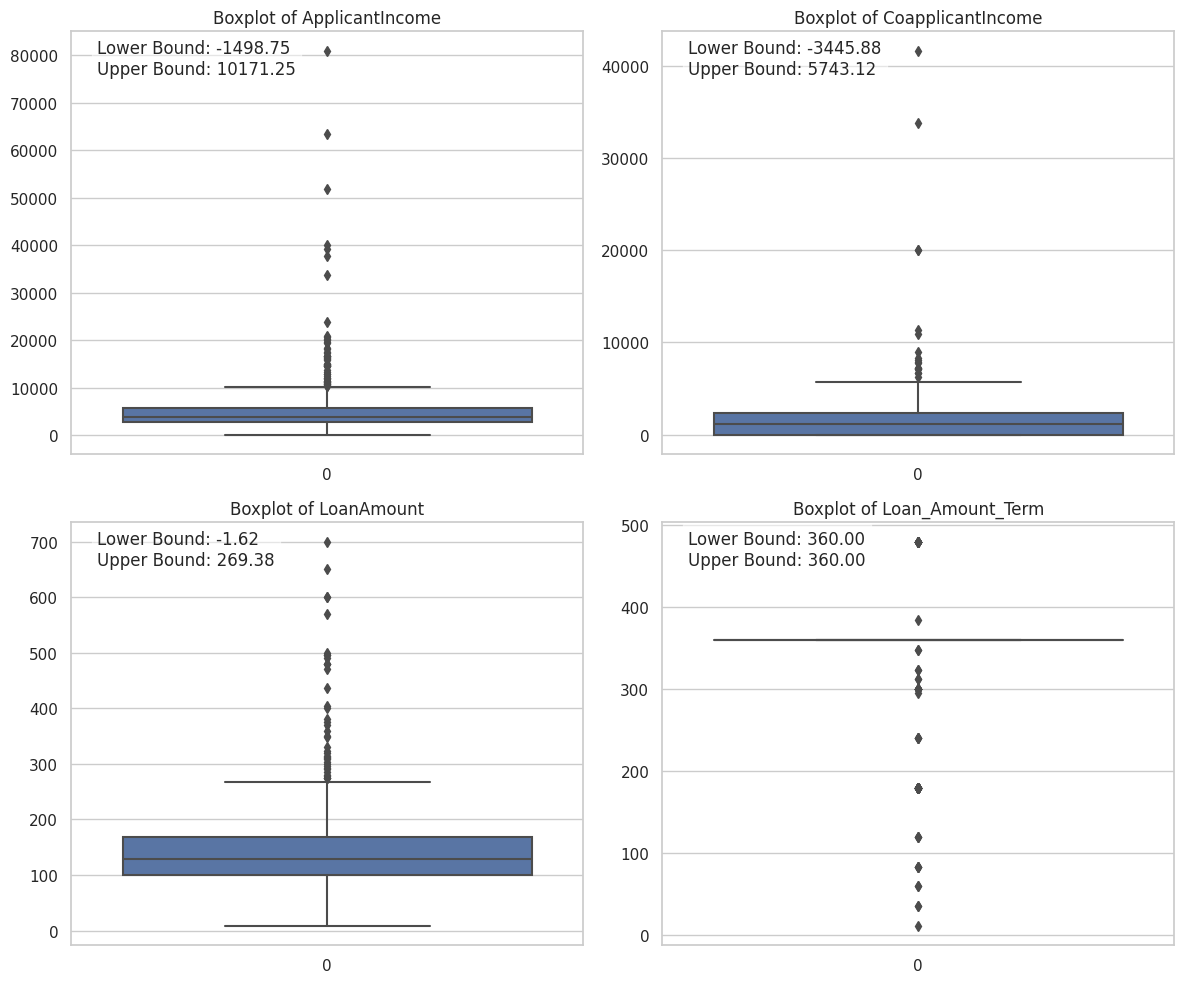

In [388]:
# Set up Seaborn style
sns.set(style="whitegrid")

# List of columns to visualize
columns_to_plot = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Calculate Q1, Q3, and IQR for each column
outlier_info = {}
for col in columns_to_plot:
    q1 = imputed_training_data[col].quantile(0.25)
    q3 = imputed_training_data[col].quantile(0.75)
    iqr = q3 - q1

    # Calculate outer bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_info[col] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}

# Create a 2-row plot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Create box plots for the specified columns in the grid
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        col_name = columns_to_plot[i * 2 + j]
        sns.boxplot(data=imputed_training_data[col_name], ax=ax)
        ax.set_title(f'Boxplot of {col_name}')

        # Display outlier information
        ax.text(0.05, 0.9, f'Lower Bound: {outlier_info[col_name]["lower_bound"]:.2f}\nUpper Bound: {outlier_info[col_name]["upper_bound"]:.2f}',
                transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [389]:
# Count the values greater than 120 in the 'sum_gamerounds' column
count_greater_than_10172 = (imputed_training_data['ApplicantIncome'] > 10172).sum()
count_greater_than_5744 = (imputed_training_data['CoapplicantIncome'] > 5744).sum()
count_greater_than_270 = (imputed_training_data['LoanAmount'] > 270).sum()
count_greater_than_360 = (imputed_training_data['Loan_Amount_Term'] > 360).sum()

print("Number of values > 120:", count_greater_than_10172)
print("Number of values > 5744:", count_greater_than_5744)
print("Number of values > 270:", count_greater_than_270)
print("Number of values > 360:", count_greater_than_360)

Number of values > 120: 50
Number of values > 5744: 18
Number of values > 270: 40
Number of values > 360: 16


* There are too many outliers in applicant income and loan amount columns , we cannot drop them directly. As for other 2 columns, we care comfortable to drop them.

In [390]:
# Drop the rows of 'CoapplicantIncome' and 'Loan_amount_Term' column
imputed_training_data = imputed_training_data[imputed_training_data['CoapplicantIncome'] <= 5744]
imputed_training_data = imputed_training_data[imputed_training_data['Loan_Amount_Term'] <= 360]

# Check the modified DataFrame
imputed_training_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,580.000000,580.000000,580.000000,580.000000
mean,5430.425862,1298.492965,142.818621,338.971034
std,6183.463080,1469.121258,79.280935,61.210599
min,150.000000,0.000000,9.000000,12.000000
25%,2917.000000,0.000000,100.000000,360.000000
50%,3815.000000,1036.000000,127.000000,360.000000
75%,5803.750000,2202.250000,162.000000,360.000000
max,81000.000000,5701.000000,700.000000,360.000000


In [391]:
# check outliers for other 2 columns using datavisualisation
count_greater_than_20000 = (imputed_training_data['ApplicantIncome'] > 20000).sum()
count_greater_than_300 = (imputed_training_data['LoanAmount'] > 300).sum()
print("Number of values > 20000:", count_greater_than_20000)
print("Number of values > 300:", count_greater_than_300)

Number of values > 20000: 10
Number of values > 300: 23


In [392]:
# Drop the rows of 'CoapplicantIncome' and 'Loan_amount_Term' column
imputed_training_data = imputed_training_data[imputed_training_data['ApplicantIncome'] <= 20000]
imputed_training_data = imputed_training_data[imputed_training_data['LoanAmount'] <= 300]

# Check the modified DataFrame
imputed_training_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,554.000000,554.000000,554.000000,554.000000
mean,4592.584838,1284.138845,130.911191,338.742238
std,2847.805644,1429.313682,50.818350,61.727668
min,150.000000,0.000000,9.000000,12.000000
25%,2875.250000,0.000000,100.000000,360.000000
50%,3717.000000,1084.500000,125.000000,360.000000
75%,5417.000000,2167.750000,158.750000,360.000000
max,18165.000000,5701.000000,300.000000,360.000000


#### Dealing with Missing Values in Predicting Dataset

In [393]:
# Indices of numerical and categorical columns
num_cols = [6, 7, 8, 9]  # Indices of numerical columns
cat_cols = [0, 1, 2, 3, 4, 5, 10, 11]  # Indices of categorical columns

# Separate numerical and categorical columns for training data
numerical_data = predict.iloc[:, num_cols]
categorical_data = predict.iloc[:, cat_cols]

# Initialize KNNImputer for numerical data
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors
imputed_numerical_data = knn_imputer.fit_transform(numerical_data)

# Initialize SimpleImputer for categorical data (using mode strategy)
cat_imputer = SimpleImputer(strategy='most_frequent')
imputed_categorical_data = cat_imputer.fit_transform(categorical_data)

# Convert back to DataFrames
imputed_numerical_df = pd.DataFrame(imputed_numerical_data, columns=numerical_data.columns)
imputed_categorical_df = pd.DataFrame(imputed_categorical_data, columns=categorical_data.columns)

# Combine imputed numerical and categorical DataFrames
imputed_predict_data = pd.concat([imputed_numerical_df, imputed_categorical_df], axis=1)

In [394]:
# recheck missing values
imputed_predict_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Credit_History       0
Property_Area        0
dtype: int64

In [395]:
# show 5 rows
imputed_predict_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,5720.0,0.0,110.0,360.0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban
1,3076.0,1500.0,126.0,360.0,LP001022,Male,Yes,1,Graduate,No,1.0,Urban
2,5000.0,1800.0,208.0,360.0,LP001031,Male,Yes,2,Graduate,No,1.0,Urban
3,2340.0,2546.0,100.0,360.0,LP001035,Male,Yes,2,Graduate,No,1.0,Urban
4,3276.0,0.0,78.0,360.0,LP001051,Male,No,0,Not Graduate,No,1.0,Urban


In [396]:
# recheck the dataset
imputed_predict_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.749864,342.306267
std,4910.685399,2334.232099,61.572853,64.811946
min,0.000000,0.000000,28.000000,6.000000
25%,2864.000000,0.000000,100.500000,360.000000
50%,3786.000000,1025.000000,125.000000,360.000000
75%,5060.000000,2430.500000,159.500000,360.000000
max,72529.000000,24000.000000,550.000000,480.000000


### Dealing With Outliers for predicting data using IQR method and data visualisation.

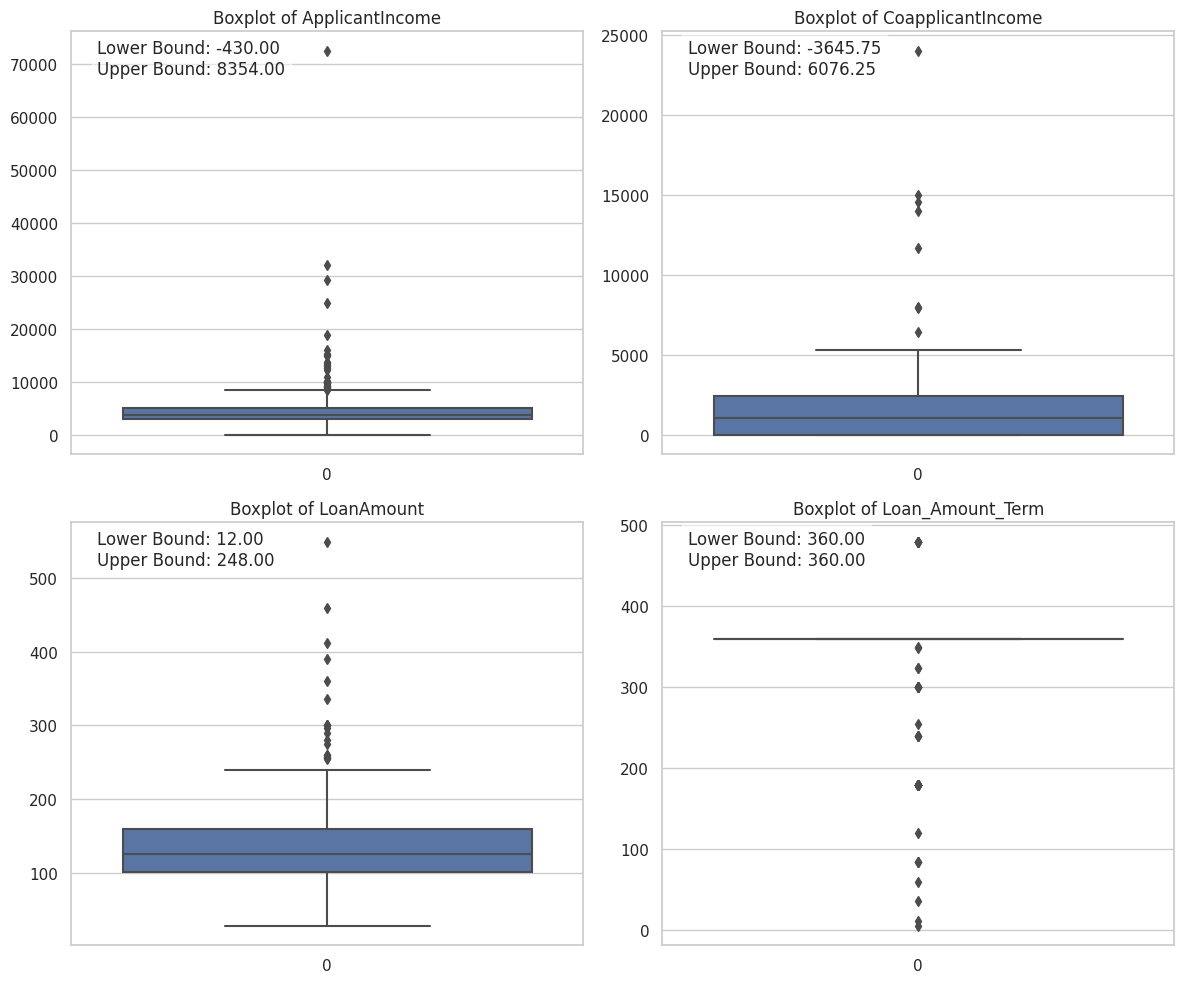

In [397]:
# Set up Seaborn style
sns.set(style="whitegrid")

# List of columns to visualize
columns_to_plot = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Calculate Q1, Q3, and IQR for each column
outlier_info = {}
for col in columns_to_plot:
    q1 = imputed_predict_data[col].quantile(0.25)
    q3 = imputed_predict_data[col].quantile(0.75)
    iqr = q3 - q1

    # Calculate outer bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_info[col] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}

# Create a 2-row plot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Create box plots for the specified columns in the grid
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        col_name = columns_to_plot[i * 2 + j]
        sns.boxplot(data=imputed_predict_data[col_name], ax=ax)
        ax.set_title(f'Boxplot of {col_name}')

        # Display outlier information
        ax.text(0.05, 0.9, f'Lower Bound: {outlier_info[col_name]["lower_bound"]:.2f}\nUpper Bound: {outlier_info[col_name]["upper_bound"]:.2f}',
                transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [398]:
# Count the values greater than 120 in the 'sum_gamerounds' column
count_greater_than_20000 = (imputed_predict_data['ApplicantIncome'] > 20000).sum()
count_greater_than_6077 = (imputed_predict_data['CoapplicantIncome'] > 6077).sum()
count_greater_than_248 = (imputed_predict_data['LoanAmount'] > 248).sum()
count_greater_than_360 = (imputed_predict_data['Loan_Amount_Term'] > 360).sum()

print("Number of values > 20000:", count_greater_than_20000)
print("Number of values > 5744:", count_greater_than_6077)
print("Number of values > 270:", count_greater_than_248)
print("Number of values > 360:", count_greater_than_360)

Number of values > 20000: 4
Number of values > 5744: 8
Number of values > 270: 19
Number of values > 360: 8


In [399]:
# drop the outliers
imputed_predict_data = imputed_predict_data[imputed_predict_data['ApplicantIncome'] <= 20000]
imputed_predict_data = imputed_predict_data[imputed_predict_data['CoapplicantIncome'] <= 6077]
imputed_predict_data = imputed_predict_data[imputed_predict_data['LoanAmount'] <= 248]
imputed_predict_data = imputed_predict_data[imputed_predict_data['Loan_Amount_Term'] <= 360]
# recheck the predicting dataset
imputed_predict_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,332.000000,332.000000,332.000000,332.000000
mean,4161.852410,1366.641566,126.726506,339.501205
std,2269.708048,1445.242085,41.074136,60.951686
min,0.000000,0.000000,28.000000,6.000000
25%,2789.750000,0.000000,100.000000,360.000000
50%,3687.500000,1106.500000,125.000000,360.000000
75%,4775.000000,2394.750000,150.000000,360.000000
max,18840.000000,5272.000000,235.000000,360.000000


# Exploratory Data Analysis¶

In [400]:
# check loan approval count for training data
imputed_training_data['Loan_Status'].value_counts()

Y    391
N    163
Name: Loan_Status, dtype: int64

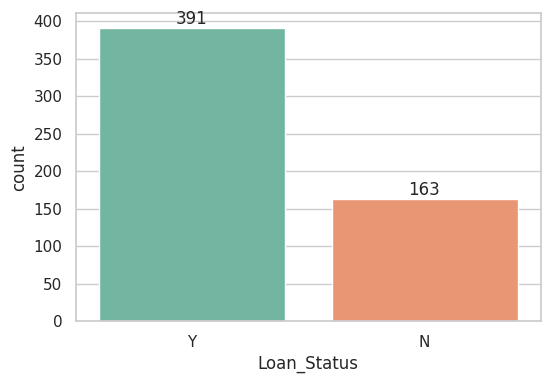

In [401]:
# visualize above using seaborn
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Loan_Status',data=imputed_training_data,palette="Set2")
for item in ax.containers:
    ax.bar_label(item,)

# The loan of 391(around 71%) people out of 554 was approved.

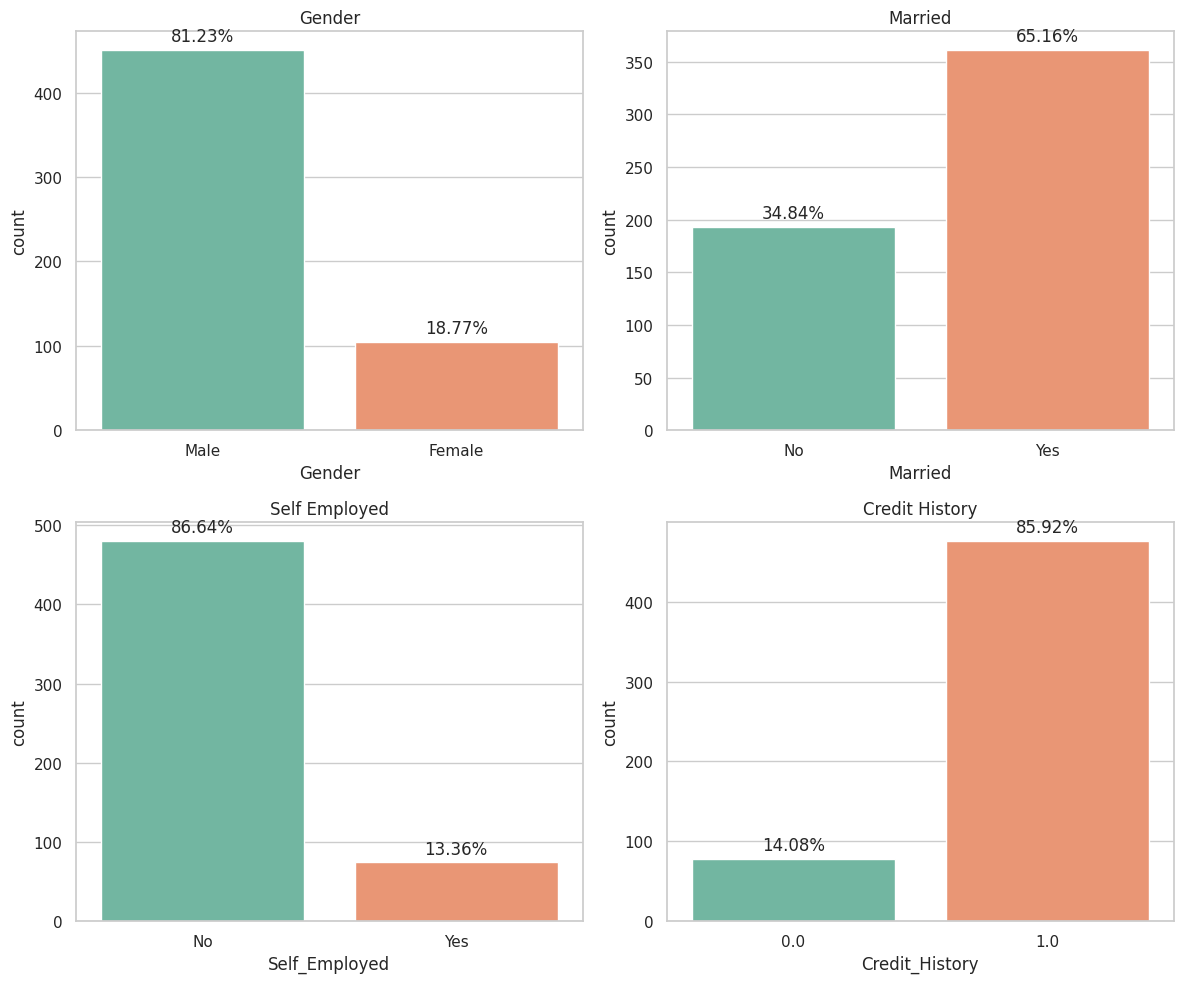

In [402]:
plt.figure(figsize=(12,10))
# check count numbers for other variables
# Create a 2x2 grid of subplots
grid = plt.GridSpec(2, 2)

# Subplot 1: Gender
plt.subplot(grid[0, 0])
sns.countplot(x='Gender', data=imputed_training_data, palette='Set2')
plt.title('Gender')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()/len(imputed_training_data):.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Subplot 2: Married
plt.subplot(grid[0, 1])
sns.countplot(x='Married', data=imputed_training_data, palette='Set2')
plt.title('Married')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()/len(imputed_training_data):.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Subplot 3: Self_Employed
plt.subplot(grid[1, 0])
sns.countplot(x='Self_Employed', data=imputed_training_data, palette='Set2')
plt.title('Self Employed')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()/len(imputed_training_data):.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Subplot 4: Credit_History
plt.subplot(grid[1, 1])
sns.countplot(x='Credit_History', data=imputed_training_data, palette='Set2')
plt.title('Credit History')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()/len(imputed_training_data):.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

- Around 82% applicants in the dataset are male.
- Around 65% people are married.
- Around 14% applicants in the dataset are self employed.
- Around 86% applicants have repaid their debts.

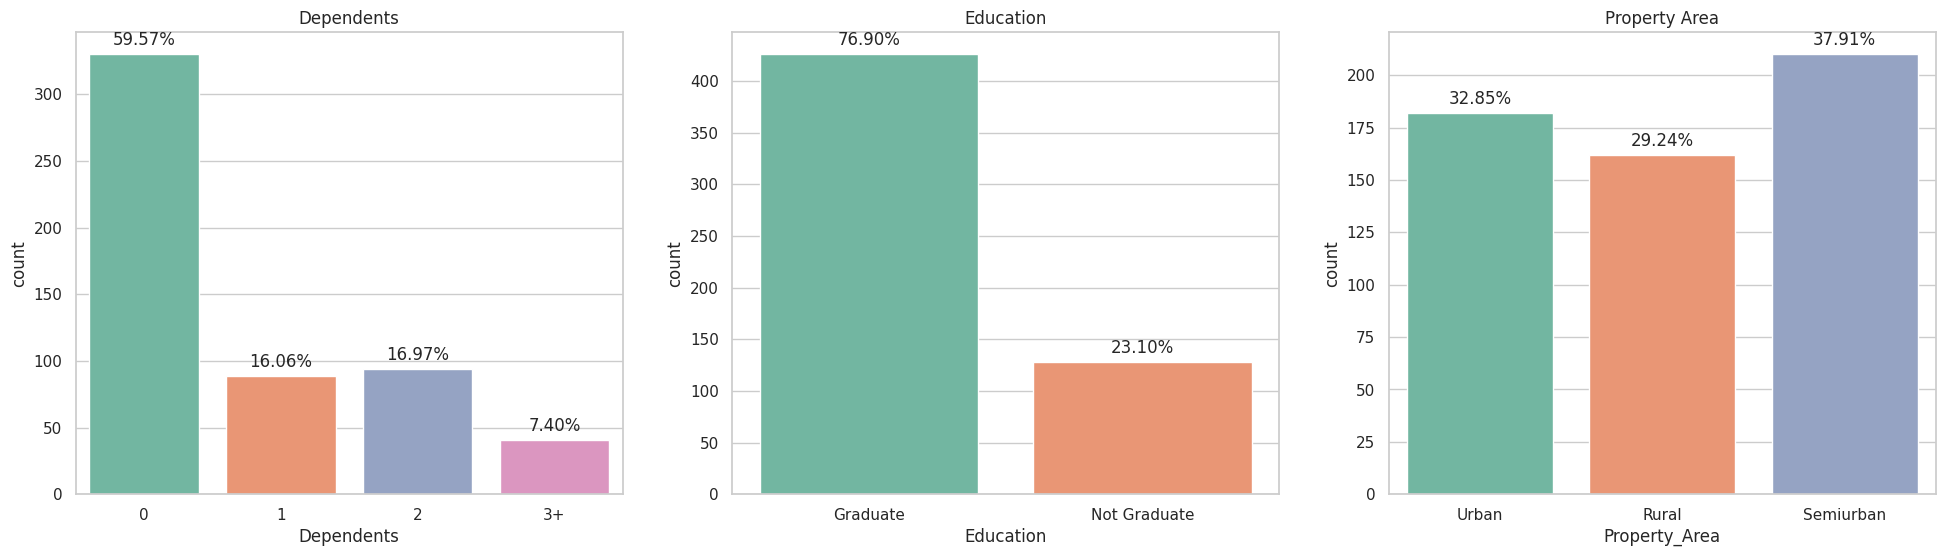

In [403]:
plt.figure(figsize=(24,6))
# check count numbers for other variables
# Create a 2x2 grid of subplots
grid = plt.GridSpec(1, 3)

# Subplot 1: Gender
plt.subplot(grid[0, 0])
sns.countplot(x='Dependents', data=imputed_training_data, palette='Set2')
plt.title('Dependents')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()/len(imputed_training_data):.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Subplot 2: Married
plt.subplot(grid[0, 1])
sns.countplot(x='Education', data=imputed_training_data, palette='Set2')
plt.title('Education')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()/len(imputed_training_data):.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Subplot 3: Self_Employed
plt.subplot(grid[0, 2])
sns.countplot(x='Property_Area', data=imputed_training_data, palette='Set2')
plt.title('Property Area')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()/len(imputed_training_data):.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

- 60% of the applicants don't have dependents.
- Around 77% of the applicants are graduate.
- 38% of the applicants are from Semiurban area and 33% of the applicants are from urban area.

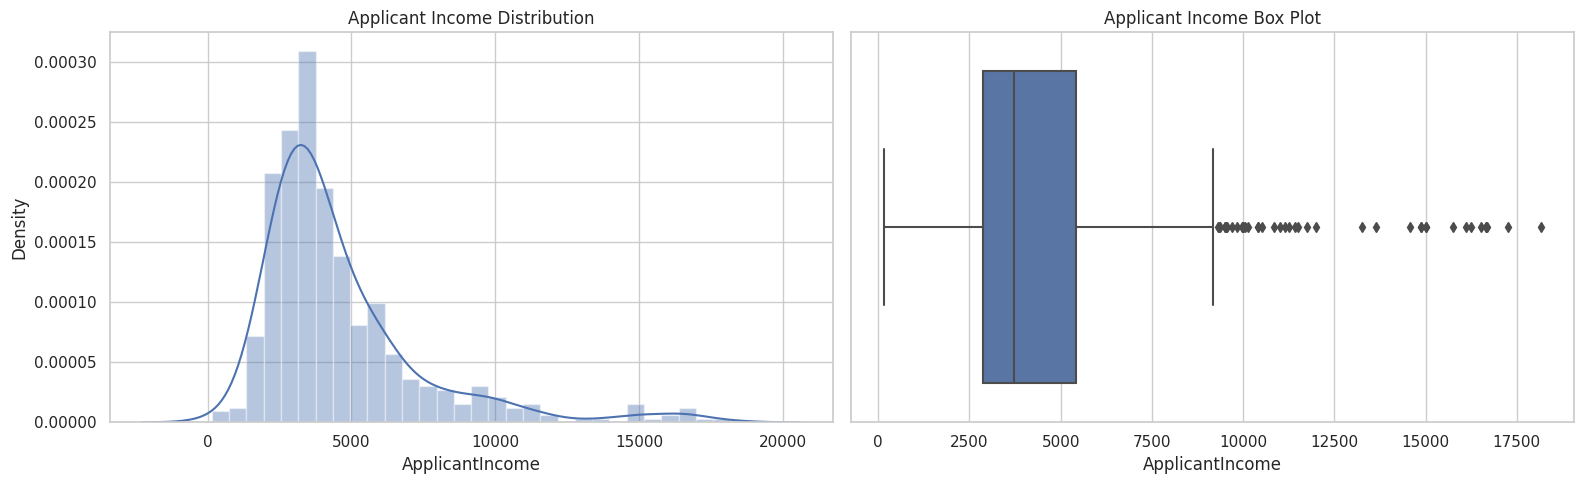

In [404]:
plt.figure(figsize=(16, 5))

# Subplot 1: Distribution Plot
plt.subplot(121)
sns.distplot(imputed_training_data['ApplicantIncome'])
plt.title('Applicant Income Distribution')

# Subplot 2: Box Plot
plt.subplot(122)
sns.boxplot(x=imputed_training_data['ApplicantIncome'])
plt.title('Applicant Income Box Plot')

plt.tight_layout()
plt.show()

* Most of the applicants' income are between 3000 and 6000.

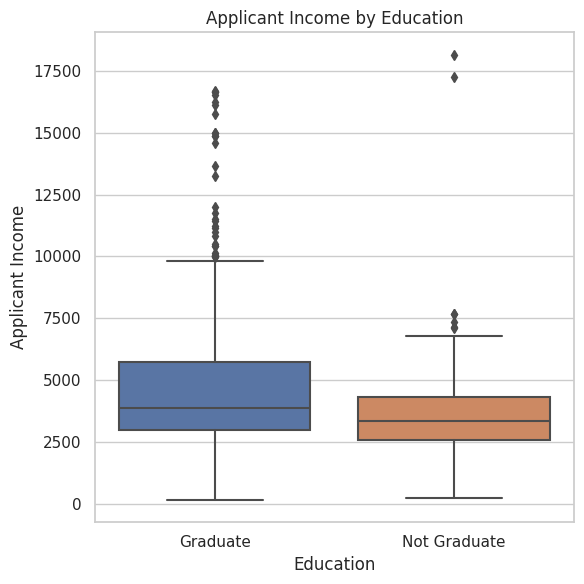

In [405]:
plt.figure(figsize=(6, 6))

# Box Plot by Education
sns.boxplot(x='Education', y='ApplicantIncome', data=imputed_training_data)
plt.title('Applicant Income by Education')
plt.xlabel('Education')
plt.ylabel('Applicant Income')

plt.tight_layout()
plt.show()

* The income of applicants who are graduates are much higher than applicants who are not graduates.

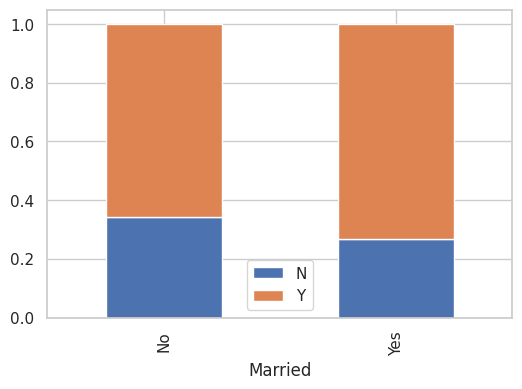

In [406]:
Married = pd.crosstab(imputed_training_data['Married'], imputed_training_data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

* From above, we can see that people who are married had relatively higher loan approval rate.

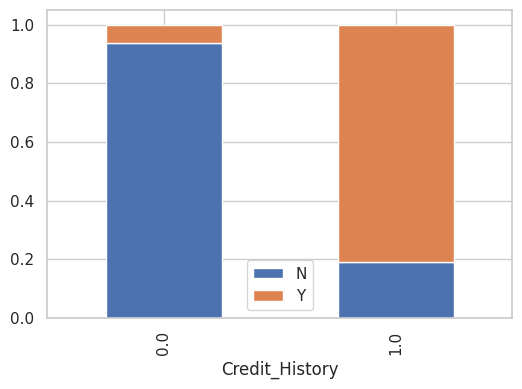

In [407]:
Credit_History = pd.crosstab(imputed_training_data['Credit_History'], imputed_training_data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

* From above, we can see that people who had paid their debt have much higher loan approval rate.

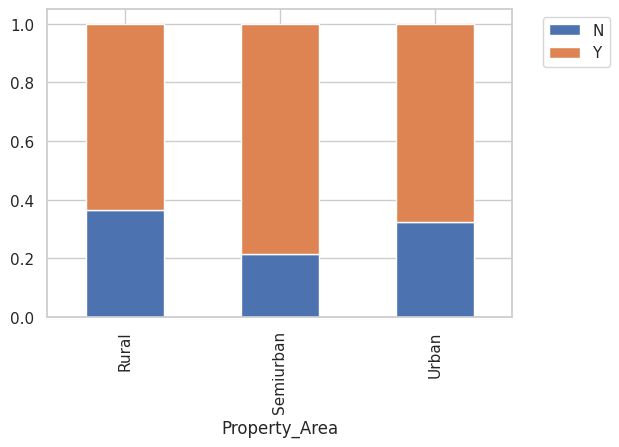

In [408]:
Property_Area = pd.crosstab(imputed_training_data['Property_Area'], imputed_training_data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

> Insights:
- Proportion of married applicants is higher for the approved loans.
- People with credit history as 1 are more likely to get their loan approved.
- Proportion of loans getting approved in semiurban area is higher compared to rural or urban area.

In [409]:
imputed_training_data['Total_Income'] = imputed_training_data['ApplicantIncome'] + imputed_training_data['CoapplicantIncome']
bins = [0,2500,4000,6000,10000]
group= ['Low', 'Average', 'High', 'Very High']
imputed_training_data['Total_Income_bin'] = pd.cut(imputed_training_data['Total_Income'], bins, labels=group)
imputed_training_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,5849.0,0.0,147.8,360.0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y,5849.0,High
1,4583.0,1508.0,128.0,360.0,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,6091.0,Very High
2,3000.0,0.0,66.0,360.0,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,3000.0,Average
3,2583.0,2358.0,120.0,360.0,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4941.0,High
4,6000.0,0.0,141.0,360.0,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,6000.0,High


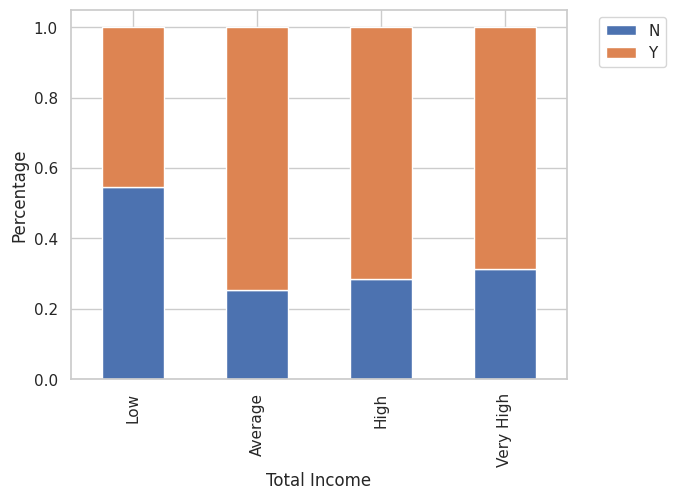

In [410]:
Total_Income_bin = pd.crosstab(imputed_training_data['Total_Income_bin'], imputed_training_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

### Proportions of loan getting approvals for applicants having low Total_Income is very less compared to that of applicants with Average, High and Very High income.

In [411]:
imputed_training_data = imputed_training_data.drop(['Total_Income', 'Total_Income_bin'], axis=1)

In [412]:
imputed_training_data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_ID', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [413]:
# change the label for column values
imputed_training_data['Dependents'].replace('3+', 3, inplace=True)
imputed_predict_data['Dependents'].replace('3+', 3, inplace=True)
imputed_training_data['Loan_Status'].replace('N', 0, inplace=True)
imputed_training_data['Loan_Status'].replace('Y', 1, inplace=True)

### Correlation Analysis

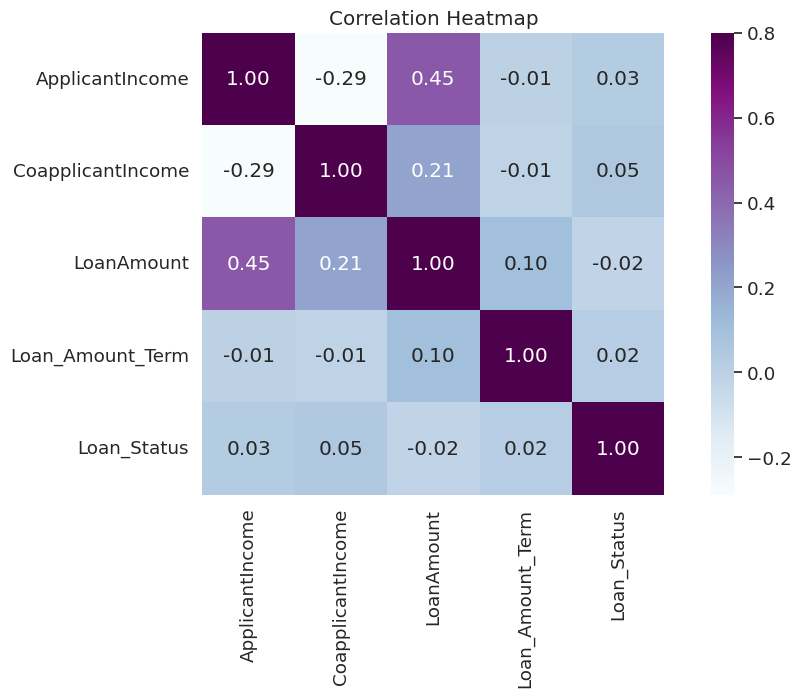

In [414]:
# Calculate the correlation matrix
correlation_matrix = imputed_training_data.corr()

plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", vmax=0.8, square=True, cmap='BuPu')

plt.title('Correlation Heatmap')
plt.show()

### We can see that most correlated variables are (ApplicantIncome-LoanAmount) and (Credit_History-Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

# Data Cleaning¶

# Model Building

In [415]:
X = imputed_training_data.drop('Loan_Status', axis = 1)
y = imputed_training_data['Loan_Status']

# one hot encoding

In [416]:
X = pd.get_dummies(X)
train = pd.get_dummies(imputed_training_data)
predict = pd.get_dummies(imputed_predict_data)

### Model 1 Decision Tree

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [418]:
model = DecisionTreeClassifier(random_state=1)

In [419]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [420]:
predictions = model.predict(X_test)

In [421]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.52      0.58        58
           1       0.77      0.85      0.81       109

    accuracy                           0.74       167
   macro avg       0.71      0.69      0.69       167
weighted avg       0.73      0.74      0.73       167



In [422]:
# Calculate accuracy
accuracy_dt = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy_dt:.2f}")

Accuracy: 0.74


In [423]:
print(accuracy_score(y_test, predictions))

0.7365269461077845


In [424]:
# Get feature importances
feature_importances = model.feature_importances_
# Select the feature names excluding 'Loan_Status' column
feature_names = [col for col in imputed_training_data.columns if col != 'Loan_Status']

In [425]:
# Print feature importances
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance}")

ApplicantIncome: 0.13033508328670054
CoapplicantIncome: 0.05240845961641681
LoanAmount: 0.1102428223181798
Loan_Amount_Term: 0.038265643404139786
Loan_ID: 0.0
Gender: 0.0
Married: 0.0
Dependents: 0.0
Education: 0.0
Self_Employed: 0.0
Credit_History: 0.0
Property_Area: 0.0


### Model 2 Random Forest

In [426]:
rfmodel = RandomForestClassifier(n_estimators=500)

In [427]:
rfmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [428]:
rfpredictions = rfmodel.predict(X_test)

In [429]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, rfpredictions)
print(f"Accuracy: {accuracy_rf:.2f}")

Accuracy: 0.78


### Model 3 KNN

#### Find best parameters using hyperparameter tuning ---GridSearch.

In [430]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Initialize knn Classifier() ... name your decision model "knn"
knn=KNeighborsClassifier()

# Train a knn model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [431]:
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}# frind the best k value from 1 to 25

#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)# cv stands for cross validation

#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [432]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_score_)
print(knn_gs.best_params_)
print(knn_gs.best_estimator_)

0.6977022977022977
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)


* From the above result, we can see that the optimal k value should be 13 , so we set our n_neighbors to 13.

In [433]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Initialize knn Classifier() ... name your decision model "knn"
knn=KNeighborsClassifier(n_neighbors=13)

# Train a knn model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [434]:
# Calculate accuracy
accuracy_knn = accuracy_score(y_test, knn.predict(X_test))
print(f"Accuracy: {accuracy_knn:.2f}")

Accuracy: 0.73


### Model 4 XG Boost

#### XGBoost (Extreme Gradient Boosting) is a popular and powerful machine learning algorithm that belongs to the gradient boosting family. It is designed to handle tabular data for regression, classification, and ranking tasks. XGBoost builds an ensemble of decision trees sequentially, where each new tree is trained to correct the errors made by the previous ones. It utilizes a combination of gradient boosting techniques and regularization to improve model performance and prevent overfitting.

In [435]:
# Initialize the XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy_xgb:.2f}")

Accuracy: 0.81


### Model 5 Neural Network

In [436]:
# model building
nn = MLPClassifier(solver='lbfgs', max_iter=500,random_state=0)
nn.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=0, solver='lbfgs')

In [437]:
print(metrics.classification_report(y_test, nn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.13      0.22        45
           1       0.75      0.98      0.85       122

    accuracy                           0.75       167
   macro avg       0.71      0.55      0.54       167
weighted avg       0.73      0.75      0.68       167



In [438]:
# Calculate accuracy
accuracy_nn = accuracy_score(y_test, nn.predict(X_test))
print(f"Accuracy: {accuracy_nn:.2f}")

Accuracy: 0.75


### Model 6 SVM

In [439]:
# initialize
svm = SVC(gamma='auto', probability=True)
# fit the model
svm.fit(X_train, y_train)

SVC(gamma='auto', probability=True)

In [440]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, svm.predict(X_test))
print(f"Accuracy: {accuracy_svm:.2f}")

Accuracy: 0.74


### Model 7 Logistic Regression

In [441]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)#—_iter refers to iteration
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [442]:
# Calculate accuracy
accuracy_lr = accuracy_score(y_test, lr.predict(X_test))
print(f"Accuracy: {accuracy_lr:.2f}")

Accuracy: 0.84


### Visualize the Model Accuracy

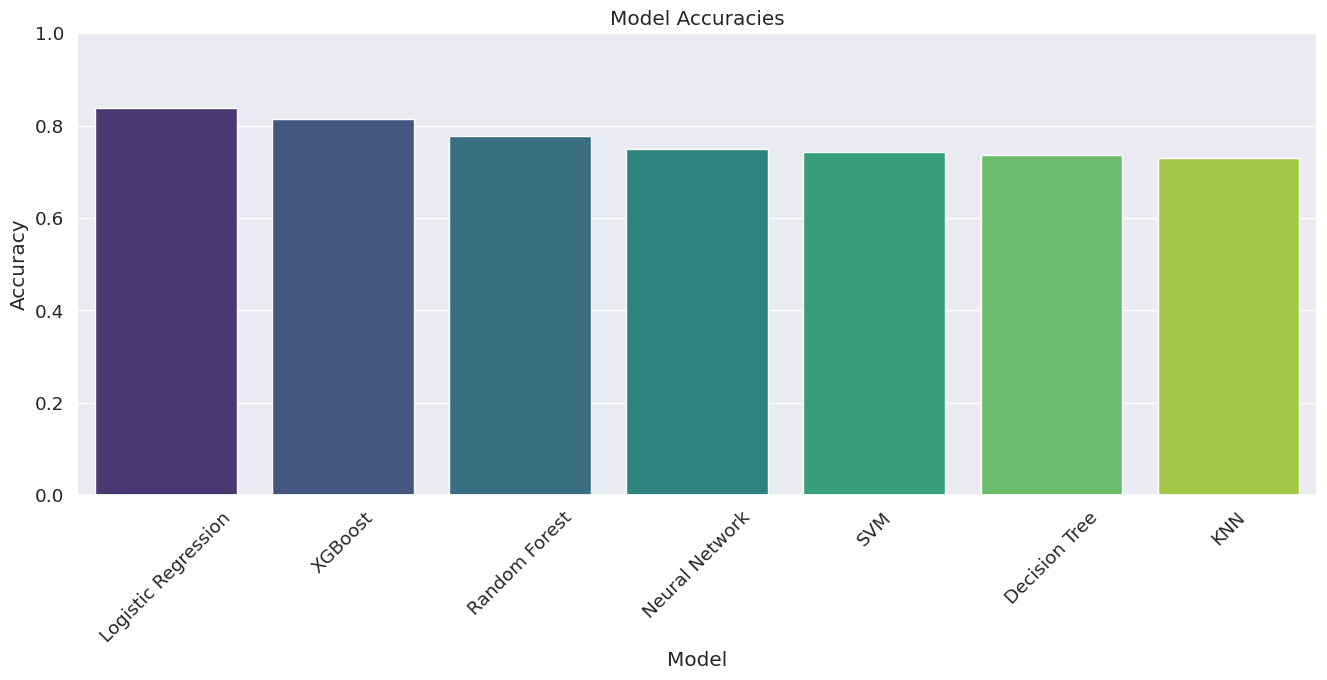

In [443]:
# Create a DataFrame to hold model names and accuracy values
data = {
    'Model': ['KNN', 'Decision Tree', 'XGBoost', 'Random Forest', 'Logistic Regression', 'SVM', 'Neural Network'],
    'Accuracy': [accuracy_knn, accuracy_dt, accuracy_xgb, accuracy_rf, accuracy_lr, accuracy_svm, accuracy_nn]
}

df = pd.DataFrame(data)

# Sort the DataFrame by accuracy values in descending order
df = df.sort_values(by='Accuracy', ascending=False)

# Create a bar plot using seaborn
plt.figure(figsize=(16, 6))
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0.0, 1.0)  # Adjust y-axis limits as needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()


### Visualize Feature Importance Using Random Forest Model

In [444]:
# Get feature importances
feature_importances = rfmodel.feature_importances_
# Select the feature names excluding 'Loan_Status' column
feature_names = [col for col in imputed_training_data.columns if col != 'Loan_Status']
# Create a dictionary to hold feature importances and their corresponding names
feature_importance_dict = {feature: importance for feature, importance in zip(feature_names, feature_importances)}

# Sort the dictionary by importance values in descending order
sorted_importance_dict = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}

# Print feature importances in descending order
for feature, importance in sorted_importance_dict.items():
    print(f"{feature}: {importance}")

LoanAmount: 0.0785722499267588
ApplicantIncome: 0.07119767851488142
CoapplicantIncome: 0.04778162635260819
Loan_Amount_Term: 0.017396073057887346
Property_Area: 0.0018723213117703044
Credit_History: 0.0001660054709134258
Education: 0.0001491673451742941
Loan_ID: 0.00013867424596915017
Self_Employed: 0.00011866946553635529
Gender: 0.0
Married: 0.0
Dependents: 0.0


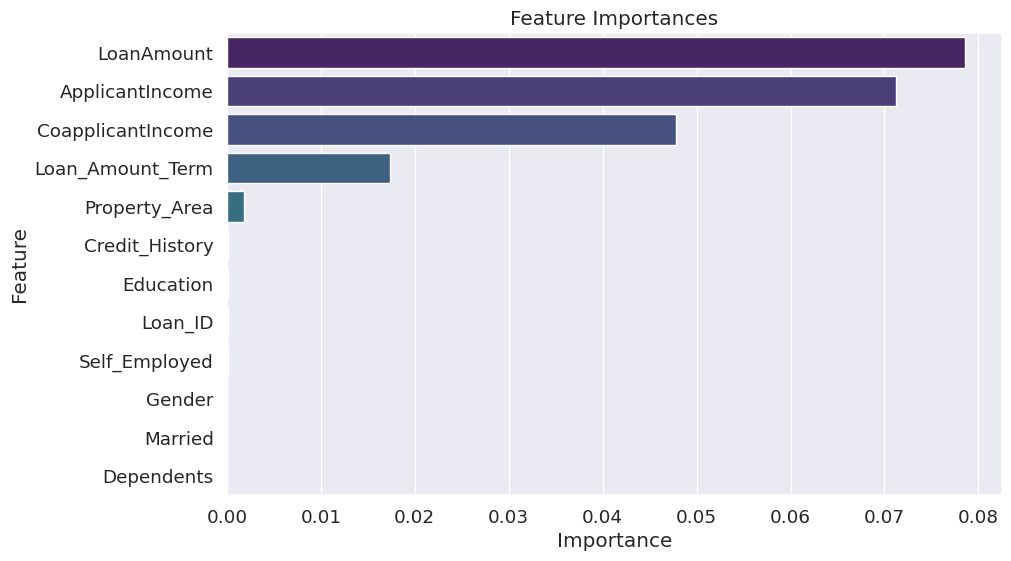

In [445]:
# Convert the sorted dictionary to lists for plotting
sorted_feature_names = list(sorted_importance_dict.keys())
sorted_importance_values = list(sorted_importance_dict.values())

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance_values, y=sorted_feature_names, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

#### From the above accuracy report we can see that, Logistic Regression performs best with an accuracy of 84%.
Also, we can see that Applicant Income, Loan Amount and Coapplicant Income are top 3 features that influence whether the locan can be apprpved or not.